In [164]:
%matplotlib inline
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import re
import datetime
import sklearn

In [4]:
#note to self: opening a csv file in excel may corrupt the data!
data = pd.read_csv('../invoices.csv')
data.head()

,id,date,subtotal,freight,tax,total,discount,paid,delivered,order_id,cust_id,cust_name,deleted,contents,bk_order_id,type,sales,purchase_info
0,1012516,2016-07-05 16:16:04,313.5,0.0,47.03,360.53,0.0,0,1,5843,218,The Accessory Shop,0,"[{""rowid"":""894db62f7b7a6ed2f2a277dae56a017c"",""...",0,invoice,NaN,NaN
1,1012515,2016-07-05 16:15:53,166.0,0.0,24.90,190.90,0.0,0,1,5842,2527,Palmers Napier,0,"[{""rowid"":""a09e75c5c86a7bf6582d2b4d75aad615"",""...",0,invoice,NaN,NaN
2,1012514,2016-07-05 00:00:00,-17.5,0.0,-2.63,-20.13,0.0,0,1,0,1604,Bettie Monroe,0,"[{""name"":""CM-11 (CREDIT)"",""qty"":""-1"",""price"":""...",0,invoice,Others,CREDIT
3,1012513,2016-07-05 00:00:00,180.0,5.0,27.75,212.75,0.0,0,1,5841,2630,Habitat,0,"[{""rowid"":""da94cbeff56cfda50785df477941308b"",""...",0,invoice,Lois,ONLINE5841
4,1012512,2016-07-05 00:00:00,97.0,8.0,15.75,120.75,0.0,0,1,0,1693,Cottage Lane,0,"[{""rowid"":""20546457187cf3d52ea86538403e47cc"",""...",0,invoice,Helen,D


In [132]:
len(data)

6410

In [20]:
##Ignore this! I was trying to pass a json object by parsing it as a string... bad idea
#1st attempt: breaking down the 'contents column', to find what products customers are ordering
#the order data is captured in a string.
# f1 = data.contents[0]
# #take away the punctuation at the beginning and end
# f2 = f1[2:-2]
# #split the string into substrings for each row, and put into a series
# order_array = f2.split("},{")
# order_series = pd.Series(data = order_array)
# order_series[0]

In [21]:
#code for processing each 'contents' row...
#def get_contents_df(order_series):
# rowid = pd.Series()
# did = pd.Series()
# qty = pd.Series()
# price = pd.Series()
# name = pd.Series()
# discount = pd.Series()
# subtotal = pd.Series()
# count = 0
# for row in range (0, order_series.size):
#     a = order_series[row].split(',')
#     d_array = []
#     #collect data and add show to dataframe
#     for dp in a:      
#         #this accounts for the last row which is a bit weird
#         if (dp == a[len(a)-1]):
#             d2 = re.search(r'(\"\:)(.*\d)', dp)
#             d2a = d2.group(2)
#             d_array.append(d2a)
#         else:
#             d = re.search(r'(\:\")(.+\")', dp)
#             da = d.group(2)[0:-1]
#             d_array.append(da)
#         #collect all indexes for the Dataframe
#         #i = re.search(r'(\w+)(\"\:)', dp)
#         #if i.group(1) in idx:
#         #    break
#         #else:
#         #    idx.append(i.group(1))
#     if (len(d_array)<=4):
#         break
#     else:
#         rowid.set_value(count, d_array[0])
#         did.set_value(count, d_array[1])
#         qty.set_value(count, d_array[2])
#         price.set_value(count, d_array[3])
#         name.set_value(count, d_array[4])
#         discount.set_value(count, d_array[5])
#         subtotal.set_value(count, d_array[6])

#     count = count+1

# df_data = {'rowid': rowid, 'id':did, 'qty':qty, 'price':price, 'name':name, 'discount':discount, 'subtotal':subtotal}
# order_df = pd.DataFrame(df_data)
# order_df
#return order_df



In [22]:
# df_temp = pd.DataFrame()
# latest_20 = data.head(20)
# #for order in range (0, len(latest_20)):
# for order in range (0, 1):
#     f1 = latest_20.contents[order]
#     #take away the punctuation at the beginning and end
#     f2 = f1[2:-2]
#     #split the string into substrings for each row, and put into a series
#     order_array = f2.split("},{")
#     order_ss = pd.Series(data = order_array)
#     filtered_order_ss = order_ss.drop([30]).reset_index().ix[:,1]
#     print filtered_order_ss
#     df_temp = get_contents_df(order_ss)
#     df_temp['orderid'] = latest_20.id[order]
#     #dataframe = get_contents_df(filtered_order_ss)
#     #dataframe['orderid'] = latest_20.id[order]
#     #print "i've finished invoice:"
#     #print order
    
# df_temp

In [17]:
import json

In [122]:
test = json.loads(data.contents[0])

In [128]:
#Goal: make new dataframe of all orders - Caution this can take a while
#and add new columns for each order detailing which order number and customer it was from
df_orders = pd.DataFrame(test)
df_orders['order_id'] = data.id[i]
df_orders['cust_id'] = data.cust_id[i]
#for i in range (1, 5):
for i in range (1, len(data)-1):
    orders = json.loads(data.contents[i])
    temp_df = pd.DataFrame(orders)
    #add order id & customer id
    temp_df['order_id'] = data.id[i]
    temp_df['cust_id'] = data.cust_id[i]
    df_orders = df_orders.append(temp_df)
df_orders.head()

,cust_id,discount,id,name,order_id,price,qty,rowid,subtotal
0,2158,0,2860,CM-10,1006559,17.50,1,894db62f7b7a6ed2f2a277dae56a017c,17.5
1,2158,0,2175,CM-1,1006559,17.50,1,211c1e0b83b9c69fa9c4bdede203c1e3,17.5
2,2158,0,2787,CM-8,1006559,17.50,1,2e0bff759d057e28460eaa5b2cb118e5,17.5
3,2158,0,2601,CMYH-BT-4,1006559,17.50,1,e02e27e04fdff967ba7d76fb24b8069d,17.5
4,2158,0,3296,CYM-54,1006559,17.00,1,42cd63cb189c30ed03e42ce2c069566c,17.0


In [129]:
df_orders.reset_index()

,index,cust_id,discount,id,name,order_id,price,qty,rowid,subtotal
0,0,2158,0,2860,CM-10,1006559,17.50,1,894db62f7b7a6ed2f2a277dae56a017c,17.5
1,1,2158,0,2175,CM-1,1006559,17.50,1,211c1e0b83b9c69fa9c4bdede203c1e3,17.5
2,2,2158,0,2787,CM-8,1006559,17.50,1,2e0bff759d057e28460eaa5b2cb118e5,17.5
3,3,2158,0,2601,CMYH-BT-4,1006559,17.50,1,e02e27e04fdff967ba7d76fb24b8069d,17.5
4,4,2158,0,3296,CYM-54,1006559,17.00,1,42cd63cb189c30ed03e42ce2c069566c,17.0
5,5,2158,0,3297,CYM-81,1006559,17.00,1,7a4bf9ba2bd774068ad50351fb898076,17.0
6,6,2158,0,3287,CYM-2,1006559,17.00,1,946e3ece1fc8b24bd656449d88eca941,17.0
7,7,2158,0,3292,CYM-12,1006559,17.00,1,cfcce0621b49c983991ead4c3d4d3b6b,17.0
8,8,2158,0,3293,CYM-13,1006559,17.00,1,ca3ec598002d2e7662e2ef4bdd58278b,17.0
9,9,2158,0,4996,FW2-54,1006559,5.50,1,e586a4f55fb43a540c2e9dab45e00f53,5.5


In [136]:
#check that there are the same number of invoices, initially 6410 invoices
len(df_orders.groupby('order_id'))

6408

In [130]:
#how many products do we have?
products = df_orders.groupby('name')
len(products)

8668

In [131]:
#how many of each product?
product_df = pd.Series(products.size())
#let's get the top 100 products
top_products = product_df.sort_values(ascending=False).head(100)
top_products

name
 Rural Ticket    353
DXWB-53          306
MDD-82-9         272
MDD-8            269
MDD-9-82         258
DXWB-8           256
DXWB-32          235
SGM-SN-82        233
MDD-4-9          232
SGM-SN-53        232
MDD-54-9         230
MDD-9-32         228
MDD-9-53         224
MDD-1-9          223
MDD-12-9         218
SGM-SN-8         212
MDD-53-9         203
FGR-54           199
FGR-8            198
MDD-9-1          195
DXWB-81          195
CUSHION INNER    193
FGR-82           192
DXWB-11          191
MDD-2-9          184
SGM-SN-11        182
SR-MTY-13        178
MDD-1            178
MMD-8            177
SGM-SN-4         174
                ... 
BLS-DD-9         143
FGR-71           142
YRWB-DG-8        142
BLS-DD-32        142
BLS-DD-10        141
BLS-CD-5         140
SR-MTY-10        140
MDD-8-9          139
FGR-52           137
BLS-DD-11        137
MDD-13           137
MDR-JB-31        137
FGR-CT-4         136
MDR-51           136
BLS-YS-54        136
BLS-TYH-53       135
SR-MTY-5

In [ ]:
#I want to look at

In [138]:
#select all data from July 2016
jun2016 = data[data.date.str.contains("2016-06")]
jun2016

,id,date,subtotal,freight,tax,total,discount,paid,delivered,order_id,cust_id,cust_name,deleted,contents,bk_order_id,type,sales,purchase_info
39,1012475,2016-06-30 00:00:00,80.0,8.0,13.20,101.20,0.0,0,1,5818,2319,jenny baker florist,0,"[{""rowid"":""a34e1ddbb4d329167f50992ba59fe45a"",""...",0,invoice,Karen,ONLINE5818
42,1012472,2016-06-30 00:00:00,41.5,5.0,6.98,53.48,0.0,0,1,5817,1682,frontline,0,"[{""rowid"":""211c1e0b83b9c69fa9c4bdede203c1e3"",""...",0,invoice,Others,ONLINE5817
45,1012469,2016-06-30 00:00:00,130.0,7.0,20.55,157.55,0.0,0,1,0,1866,Pattersons Apparel Ltd,0,"[{""rowid"":""4e8412ad48562e3c9934f45c3e144d48"",""...",0,invoice,Laurel,D
48,1012466,2016-06-30 00:00:00,32.0,7.0,5.85,44.85,0.0,0,1,5816,2704,The Seamstress Co,0,"[{""rowid"":""9bd5ee6fe55aaeb673025dbcb8f939c1"",""...",0,invoice,Others,ONLINE5816
50,1012464,2016-06-29 00:00:00,81.0,8.0,13.35,102.35,0.0,0,1,5814,2525,Paul Messerschmidt Ltd(Parkvale Pharmacy),0,"[{""rowid"":""c930eecd01935feef55942cc445f708f"",""...",0,invoice,Helen,ONLINE5814
55,1012459,2016-06-29 00:00:00,56.0,8.0,9.60,73.60,0.0,0,1,0,1651,Hurst and Taylor Ltd,0,"[{""rowid"":""b60c5ab647a27045b462934977ccad9a"",""...",0,invoice,Karen,PH
56,1012458,2016-06-29 00:00:00,149.5,12.0,24.23,185.73,0.0,0,1,0,2256,Carolyn Joy Watkins(The Wendy House),0,"[{""rowid"":""b60c5ab647a27045b462934977ccad9a"",""...",0,invoice,Helen,PH (MADAM PLUM)
59,1012455,2016-06-29 00:00:00,200.5,12.0,31.88,244.38,0.0,0,1,5811,2527,Palmers Napier,0,"[{""rowid"":""894b77f805bd94d292574c38c5d628d5"",""...",0,invoice,Helen,ONLINE5811
60,1012454,2016-06-29 00:00:00,90.0,8.0,14.70,112.70,0.0,0,1,5810,1983,Frenchpolish,0,"[{""rowid"":""a40511cad8383e5ae8ddd8b855d135da"",""...",2002933,invoice,Pauline,ONLINE5810
63,1012451,2016-06-29 00:00:00,344.5,12.0,53.48,409.98,0.0,0,1,5807,2608,Westbury Pharmacy,0,"[{""rowid"":""b928fec5932bf2fddd2cc88c038b8ccb"",""...",2002931,invoice,Helen,ONLINE5807


In [139]:
total_orders_0616 = len(jun2016)
total_orders_0616

431

In [140]:
avg_order_cost = jun2016.total.mean()
avg_order_cost

334.1693503480278

In [141]:
total_order_cost_0616 = jun2016.total.sum()
total_order_cost_0616

144026.99

In [144]:
#find out the total numbers on each day that month
jun16_bydate = jun2016.groupby('date')
#sum up the numeric data for each day
jun16_bydate['subtotal', 'freight', 'tax', 'total','paid', 'delivered'].sum()

,subtotal,freight,tax,total,paid,delivered
date,,,,,,
2016-06-01 00:00:00,17414.00,499.0,2687.06,20600.06,11,55
2016-06-02 00:00:00,6408.50,198.0,991.00,7597.50,2,20
2016-06-03 00:00:00,6480.25,209.0,1003.43,7692.68,1,18
2016-06-07 00:00:00,7585.00,194.0,1166.89,8945.89,4,28
2016-06-08 00:00:00,7479.00,230.0,1156.38,8865.38,2,20
2016-06-09 00:00:00,7433.00,221.0,1148.13,8802.13,4,25
2016-06-10 00:00:00,7115.50,194.0,1096.48,8405.98,0,22
2016-06-13 00:00:00,12233.95,256.0,1873.56,14363.51,5,27
2016-06-14 00:00:00,5409.50,260.0,850.46,6519.96,1,28


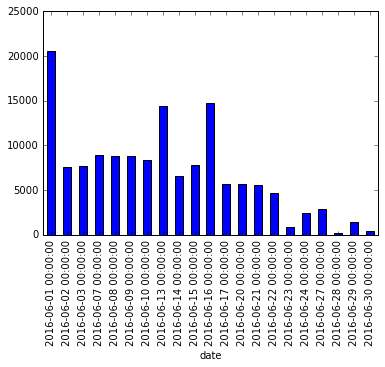

In [148]:
#Invoices per day in June
jun16_bydate.total.sum().plot.bar()

In [149]:
#Goal: I want to graph the total of each month over the last 2 years

#add year and month columns to dataset
make_year = lambda x : x[:4]
make_month = lambda x : x[5:7]

data['Year'] = data['date'].apply(make_year)
data['Month'] = data['date'].apply(make_month)
data[['Year', 'Month']]

,Year,Month
0,2016,07
1,2016,07
2,2016,07
3,2016,07
4,2016,07
5,2016,07
6,2016,07
7,2016,07
8,2016,07
9,2016,07


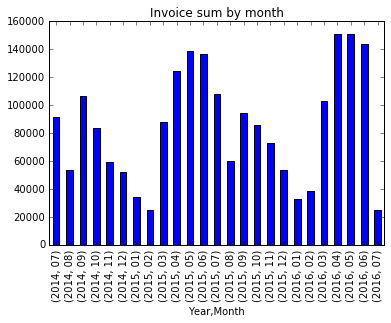

In [150]:
year_month = data.groupby(['Year', 'Month'])
year_month['total'].sum().plot.bar(title = 'Invoice sum by month')

In [176]:
#Data seems to follow a pattern based on month of year. Looks promising.
#Seems like sales are growing, a good sign
#The month of August seems to have an interesting dip. Maybe because it's the beginning of a new financial year?

In [151]:
#Try regression, but I'm not sure how well it will work on this wave-form type data..
numerical_data = data[['subtotal', 'freight', 'tax', 'total', 'discount', 'paid', 'delivered']]
numerical_data.corr()

,subtotal,freight,tax,total,discount,paid,delivered
subtotal,1.000000,0.493163,0.999865,0.999865,0.113026,-0.035617,-0.008642
freight,0.493163,1.000000,0.507406,0.507402,-0.072046,0.017934,-0.039454
tax,0.999865,0.507406,1.000000,1.000000,0.110593,-0.034939,-0.009306
total,0.999865,0.507402,1.000000,1.000000,0.110595,-0.034940,-0.009306
discount,0.113026,-0.072046,0.110593,0.110595,1.000000,-0.005890,0.002412
paid,-0.035617,0.017934,-0.034939,-0.034940,-0.005890,1.000000,0.074890
delivered,-0.008642,-0.039454,-0.009306,-0.009306,0.002412,0.074890,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x117893e90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x139bfcfd0>]], dtype=object)

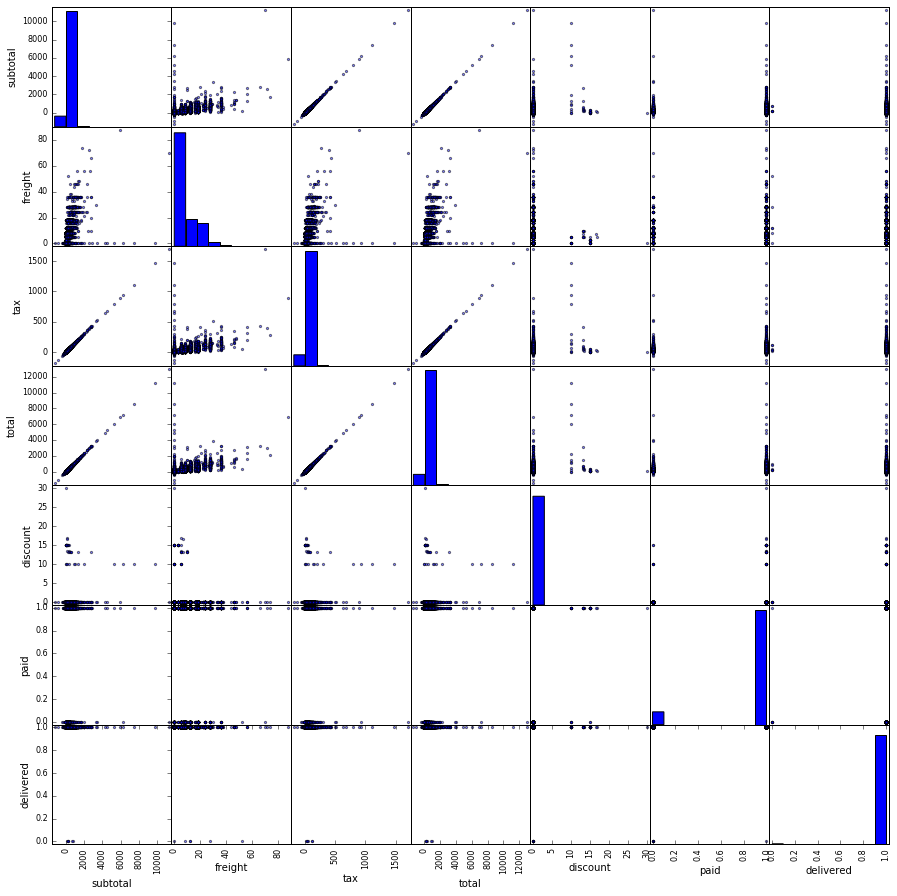

In [433]:
pd.scatter_matrix(numerical_data, figsize=(15,15))

In [153]:
#The above graph really just says the obvious.
#Makes sense that tax, frieght, subtotal and total are all related
#Let's check the sums
ym_df = year_month.aggregate(numpy.sum)[['total', 'freight','paid','delivered']]
ym_df

total  freight  paid  delivered
Year Month                                     
2014 07      91440.74   3169.5   306        307
     08      53093.28   1854.0   186        188
     09     106798.39   2987.0   323        323
     10      83883.93   2116.0   245        248
     11      59162.95   1733.0   216        217
     12      52141.18   1620.0   183        184
2015 01      34406.93   1194.0   122        122
     02      24735.48    879.0    90         90
     03      88169.00   2750.0   246        246
     04     124176.68   4216.0   332        333
     05     138842.21   4203.0   395        398
     06     136445.39   4538.0   439        441
     07     108116.83   3138.0   352        352
     08      59592.40   1857.0   206        207
     09      93955.27   2588.0   285        285
     10      85808.01   1915.0   241        241
     11      72552.38   1936.5   240        243
     12      53568.93   1458.0   192        192
2016 01      32745.69    866.0   101        103
     02      38683.52   1200.0   128        131
     03     103232.08   2356.5   212        222
     04     151210.25   3973.0   366        398
     05     150842.25   3744.0   314        445
     06     144026.99   4004.0    49        426
     07      24414.38    634.0     1         62

In [438]:
ym_df.corr()

,total,freight,paid,delivered
total,1.000000,0.958836,0.716925,0.969460
freight,0.958836,1.000000,0.758311,0.960609
paid,0.716925,0.758311,1.000000,0.750883
delivered,0.969460,0.960609,0.750883,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x122c95710>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x13deceb10>]], dtype=object)

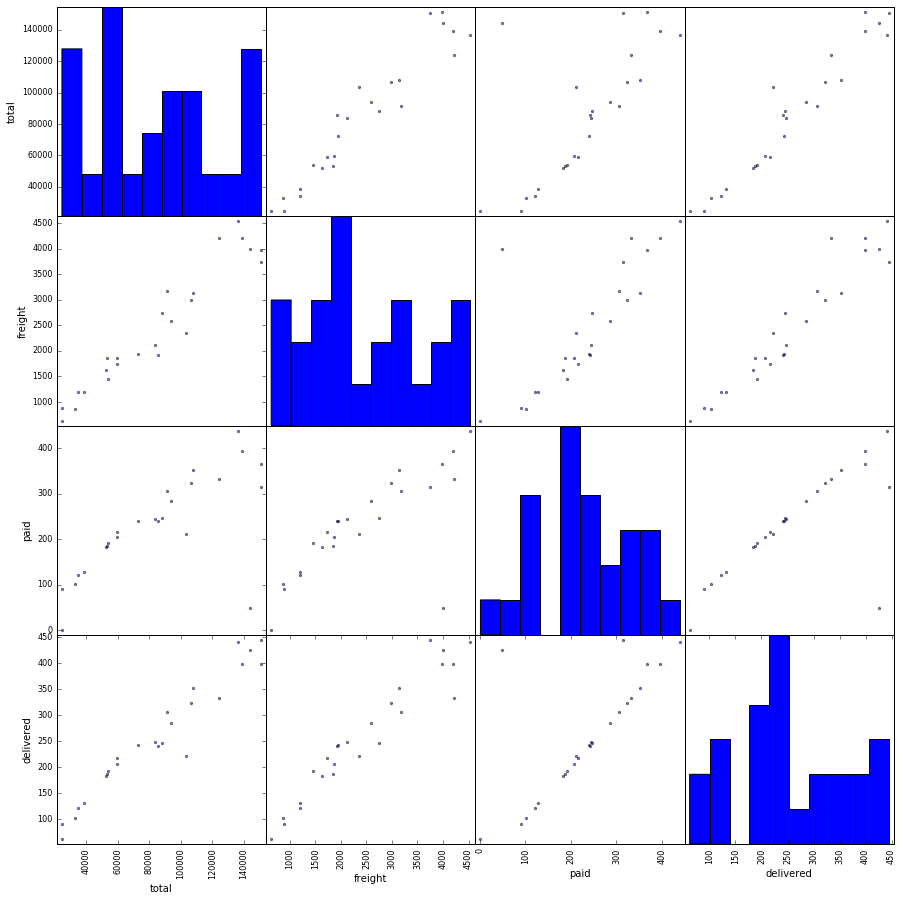

In [443]:
pd.scatter_matrix(ym_df, figsize=(15,15))

In [157]:
#It's not too interesting doing a regression on these variables
#But we can predict how much freight will cost - although this could probably be looked up easily too...
totals = ym_df.loc[ : , ['total']]
freight = ym_df.freight

In [158]:
import sklearn.linear_model
r = sklearn.linear_model.RANSACRegressor()

In [159]:
r.fit(totals, freight)

RANSACRegressor(base_estimator=None, is_data_valid=None, is_model_valid=None,
        max_trials=100, min_samples=None, random_state=None,
        residual_metric=None, residual_threshold=None, stop_n_inliers=inf,
        stop_probability=0.99, stop_score=inf)

In [162]:
#test against original data:
predictions = r.predict(totals)
predictions

array([ 2629.66445118,  1568.97191292,  3054.45776892,  2420.64273292,
        1736.85926918,  1542.63678236,  1052.10659739,   784.59383777,
        2539.16796967,  3535.14208363,  3940.79132978,  3874.49517641,
        3090.92588103,  1748.73787628,  2699.21646866,  2473.86287577,
        2107.21152961,  1582.12841418,  1006.15662125,  1170.39727694,
        2955.81346742,  4282.891895  ,  4272.71299778,  4084.20258723,
         775.71219674])

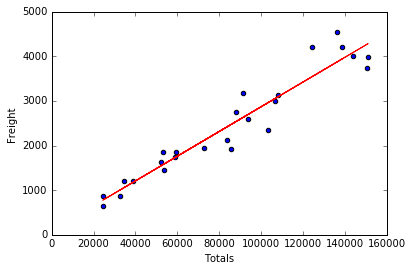

In [166]:
#draw the original data points
plt.scatter(x=ym_df.total, y=ym_df.freight)
#draw the prediction as a line to see how good the regression was
plt.plot(ym_df.total, predictions, color = 'red')
plt.xlabel('Totals')
plt.ylabel('Freight')

In [167]:
#gets the gradient of the line
r.estimator_.coef_ 
#for each dollar sold, 0.02 is spent on freight

array([ 0.02766005])

In [168]:
#minimum freight per month
r.estimator_.intercept_

100.40930334470568

In [175]:
#How much would the monthly freight cost when total invoices are 100k?
r.predict(100000)

array([ 2866.41398336])

In [174]:
#what about a $200000 one?
r.predict(200000)

array([ 5632.41866337])

In [ ]:
#Next steps
# - Add year/month data to orders, so I can map out how well each product has been doing the past two years
# - Scrape webpages & add another dataframe for product info. Includes additional data like colour & materials
# - Add more data for 2012 - 2014
# - Find the monthly trend in invoices day-by-day. Regress each month and see if there is a pattern in sales.

#Some potentially interesting questions to explore:
# - What is the business growth? I need to learn how to regress when the x-axis is time...
# - Given the month & year, how many of each product should we prepare in stock?
# - Predict the trend, lifetime, or rise & fall of each product and set price accordingly
# - Trends in colour. Is this affected by the season/month?